# Analyzing TOP Venues on Spain

In this project we are going to explore how the venues are distributed in Spain, so maybe an entrepreneur can decide what specific kind of enterprise can found and also where is the best place to create it based on the competence nearby.

The data used in this project consists on multiples dataframes:
- DataFrame with the cities and postcode of Spain
- DataFrame with the coordinates based on each Province of each City
- Foursquare Data of the principal venues of each City

The approach or methodology used in this project consists on feature engineering to group these venues into Clusters using the algorithm 'KMeans'.

The results, after making 3 clusters, show that 3 cities: Barcelona, Tarragona and Ceuta are different from the others. Being this three cities less propenses to have bars or pubs as main venue categories.

A further analysis could be done focusing specifically in these cities doing a deep research, but as a first approach these cities could be considered to open bars or pubs since Barcelona, Tarragona and Ceuta don't show as much popularity as the other cities on this kind of industry.

# 1. Get the data

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
url = 'https://es.wikipedia.org/wiki/Anexo:Provincias_de_Espa%C3%B1a_por_c%C3%B3digo_postal'

In [3]:
df = pd.read_html(url)[0]

In [4]:
df.drop('Código Ministerio del Interior', axis=1, inplace=True)

In [5]:
df.columns = ['Postcode', 'City']
df.head()

,Postcode,City
0,1,Alava
1,2,Albacete
2,3,Alicante
3,4,Almería
4,5,Ávila


As we can see there are some cities with accents, so we'll replace them for normal letters.

In [6]:
df['City'] = df['City'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

df

,Postcode,City
0,1,Alava
1,2,Albacete
2,3,Alicante
3,4,Almeria
4,5,Avila
5,6,Badajoz
6,7,Baleares
7,8,Barcelona
8,9,Burgos
9,10,Caceres


In [7]:
df.shape

(52, 2)

# 2. Getting Latitude and Longitude

In [8]:
import urllib.request
url = 'https://www.businessintelligence.info/resources/assets/listado-longitud-latitud-municipios-espana.xls'
filename = 'spain_coordinates.xls'
urllib.request.urlretrieve(url, filename)

('spain_coordinates.xls', <http.client.HTTPMessage at 0x1e1898f2ba8>)

In [9]:
df_geo = pd.read_excel(filename, skiprows=2)
df_geo.head()

,Comunidad,Provincia,Población,Latitud,Longitud,Altitud,Habitantes,Hombres,Mujeres
0,Andalucía,Almería,Abla,37.14114,-2.780104,871.16840,1504,783,721
1,Andalucía,Almería,Abrucena,37.13305,-2.797098,976.93870,1341,682,659
2,Andalucía,Almería,Adra,36.74807,-3.022522,10.97898,24373,12338,12035
3,Andalucía,Almería,Albánchez,37.28710,-2.181163,481.31230,815,422,393
4,Andalucía,Almería,Alboloduy,37.03319,-2.621750,388.43460,674,334,340


Delete the columns that we won't use, and change the names

In [10]:
df_geo.drop(['Comunidad', 'Altitud', 'Habitantes', 'Hombres', 'Mujeres'], axis=1, inplace=True)

In [11]:
df_geo.columns = ['City', 'Municipe', 'Latitude', 'Longitude']
df_geo

,City,Municipe,Latitude,Longitude
0,Almería,Abla,37.14114,-2.780104
1,Almería,Abrucena,37.13305,-2.797098
2,Almería,Adra,36.74807,-3.022522
3,Almería,Albánchez,37.28710,-2.181163
4,Almería,Alboloduy,37.03319,-2.621750
...,...,...,...,...
8107,Valencia/València,Xeresa,39.00910,-0.217992
8108,Valencia/València,Xirivella,39.46669,-0.427794
8109,Valencia/València,Yátova,39.38500,-0.808174
8110,Valencia/València,Yesa (La),39.49916,-0.426125


Here we'll do the same we did before with the other df to remove the accents.

In [12]:
df_geo['City'] = df_geo['City'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_geo['Municipe'] = df_geo['Municipe'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [13]:
df_geo

,City,Municipe,Latitude,Longitude
0,Almeria,Abla,37.14114,-2.780104
1,Almeria,Abrucena,37.13305,-2.797098
2,Almeria,Adra,36.74807,-3.022522
3,Almeria,Albanchez,37.28710,-2.181163
4,Almeria,Alboloduy,37.03319,-2.621750
...,...,...,...,...
8107,Valencia/Valencia,Xeresa,39.00910,-0.217992
8108,Valencia/Valencia,Xirivella,39.46669,-0.427794
8109,Valencia/Valencia,Yatova,39.38500,-0.808174
8110,Valencia/Valencia,Yesa (La),39.49916,-0.426125


As we can see some Cities have duplicates on his name due to being written in different languages. Example: Castellon/Castello

We're going to do a set of the names to compare them with the cities on the previous dataframe.

## Comparing both dataframes to see which names don't match

In [14]:
list_city1 = df['City'].to_list()
list_city2 = set(df_geo['City'].to_list())

# Ordering both lists
list_city1 = sorted(list_city1)
list_city2 = sorted(list_city2)

#Check what cities doesn't match
print('From df_geo:')
for city in list_city2:
    if city not in list_city1:
        print('-',city)
print('')
print('From df:')
for city in list_city1:
    if city not in list_city2:
        print('-',city)

From df_geo:
- Alicante/Alacant
- Cantabria
- Castellon/Castello
- Illes Balears
- Valencia/Valencia

From df:
- Alicante
- Baleares
- Cantabria (Santander)
- Castellon
- Valencia


Now we're going to replace the names that don't match, and also Santander and A Coruna in both dataframes.

In [15]:
df_geo['City'] = df_geo['City'].replace('Alicante/Alacant', 'Alicante')
df_geo['City'] = df_geo['City'].replace('Cantabria', 'Santander')
df_geo['City'] = df_geo['City'].replace('Castellon/Castello', 'Castellon')
df_geo['City'] = df_geo['City'].replace('Illes Balears', 'Baleares')
df_geo['City'] = df_geo['City'].replace('Valencia/Valencia', 'Valencia')
df_geo['City'] = df_geo['City'].replace('A Coruna', 'Coruna')

df['City'] = df['City'].replace('Cantabria (Santander)', 'Santander')
df['City'] = df['City'].replace('A Coruna', 'Coruna')

In [16]:
df

,Postcode,City
0,1,Alava
1,2,Albacete
2,3,Alicante
3,4,Almeria
4,5,Avila
5,6,Badajoz
6,7,Baleares
7,8,Barcelona
8,9,Burgos
9,10,Caceres


Finally we have 2 dataframes where city names match, so we can use them to do a join later.

# 3. Matching df_geo 'city' with the 'municipe' that we want to use as a center

First we're going to see what municipes don't match with it's city name

In [17]:
list_city = df['City'].to_list()
list_municipe = df_geo['Municipe'].to_list()

# Ordering both lists
list_city = sorted(list_city)
list_municipe = sorted(list_municipe)

#Check what cities doesn't match with the municipe
print('NOT MACH from df_geo:')
for city in list_city:
    if city not in list_municipe:
        print('-',city)

NOT MACH from df_geo:
- Alava
- Alicante
- Asturias
- Baleares
- Castellon
- Coruna
- Guipuzcoa
- La Rioja
- Las Palmas
- Navarra
- Vizcaya


Now, we'll replace individualy the name of the municipe (capital) with his city name, so we can match the names

In [18]:
# df_geo['Municipe'] = df_geo['Municipe'].replace('Municipe', 'NOT MATCH FROM BELOW')

df_geo['Municipe'] = df_geo['Municipe'].replace('Vitoria-Gasteiz', 'Alava')
df_geo['Municipe'] = df_geo['Municipe'].replace('Alicante/Alacant', 'Alicante')
df_geo['Municipe'] = df_geo['Municipe'].replace('Gijon', 'Asturias')
df_geo['Municipe'] = df_geo['Municipe'].replace('Manacor', 'Baleares')
df_geo['Municipe'] = df_geo['Municipe'].replace('Castellon de la Plana/Castello de la Plana', 'Castellon')
df_geo['Municipe'] = df_geo['Municipe'].replace('Coruna (A)', 'Coruna')
df_geo['Municipe'] = df_geo['Municipe'].replace('Donostia-San Sebastian', 'Guipuzcoa')
df_geo['Municipe'] = df_geo['Municipe'].replace('Logrono', 'La Rioja')
df_geo['Municipe'] = df_geo['Municipe'].replace('Palmas de Gran Canaria (Las)', 'Las Palmas')
df_geo['Municipe'] = df_geo['Municipe'].replace('Pamplona/Iruna', 'Navarra')
df_geo['Municipe'] = df_geo['Municipe'].replace('Bilbao', 'Vizcaya')

Run again the cell below to see if there is 0 'NO MATCHES'

In [19]:
# This cell is to search the correct municipe, one example: (Change 'City' to search the others)
search = df_geo[df_geo['City'] == 'Guipuzcoa']['Municipe'].to_list()
#search

Now we use city=municipe matches so we get the coordinates for the right point on the city

In [20]:
df_clean = df_geo[df_geo['City'] == df_geo['Municipe']].drop('Municipe', axis=1)
print('df_clean shape:', df_clean.shape)

df_clean = df_clean = df_clean.reset_index(drop=True)

df_clean shape: (52, 3)


# 4. Merging dataframes

In [21]:
# df_clean

In [22]:
# df

Finally we can merge both dataframes!

In [23]:
df_merged = df_clean.merge(df, on='City')

In [24]:
df_merged = df_merged[['Postcode', 'City', 'Latitude', 'Longitude']].sort_values(by='Postcode')
data = df_merged.reset_index(drop=True)
data

,Postcode,City,Latitude,Longitude
0,1,Alava,42.84641,-2.667893
1,2,Albacete,38.99765,-1.860070
2,3,Alicante,38.34520,-0.481006
3,4,Almeria,36.84016,-2.467922
4,5,Avila,40.65642,-4.700323
5,6,Badajoz,38.87860,-6.970284
6,7,Baleares,39.57434,3.201420
7,8,Barcelona,41.38792,2.169919
8,9,Burgos,42.34087,-3.699731
9,10,Caceres,39.47618,-6.370760


# 4. Explore neighbourhoods in Spain

In [25]:
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import requests
import json
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

Map of Spain

In [26]:
address = 'Spain'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Spain are {}, {}.'.format(latitude, longitude))

The coordinates of Spain are 39.3262345, -4.8380649.


In [27]:
map_spain = folium.Map(location=[latitude, longitude], zoom_start=6)
for lat, lng, postalcode, city in zip(data['Latitude'], data['Longitude'], data['Postcode'], data['City']):
    label = ' {}; {}'.format(postalcode, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_spain)  
    
map_spain

Foursquare Credentials and Version (Hidden cell)

In [28]:
# @hidden_cell

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
spain_venues = getNearbyVenues(names=data['City'],
                                   latitudes=data['Latitude'],
                                   longitudes=data['Longitude']
                                  )

Alava
Albacete
Alicante
Almeria
Avila
Badajoz
Baleares
Barcelona
Burgos
Caceres
Cadiz
Castellon
Ciudad Real
Cordoba
Coruna
Cuenca
Girona
Granada
Guadalajara
Guipuzcoa
Huelva
Huesca
Jaen
Leon
Lleida
La Rioja
Lugo
Madrid
Malaga
Murcia
Navarra
Ourense
Asturias
Palencia
Las Palmas
Pontevedra
Salamanca
Santa Cruz de Tenerife
Santander
Segovia
Sevilla
Soria
Tarragona
Teruel
Toledo
Valencia
Valladolid
Vizcaya
Zamora
Zaragoza
Ceuta
Melilla


In [31]:
# Save .csv file
#export = spain_venues.to_csv('spain_venues.csv', index = None, header=True)
#export


In [32]:
#spain_venues = pd.read_csv('spain_venues.csv')
spain_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alava,42.84641,-2.667893,la cassette,42.847755,-2.669211,Cocktail Bar
1,Alava,42.84641,-2.667893,Plaza de Abastos,42.844340,-2.667199,Grocery Store
2,Alava,42.84641,-2.667893,Bar El Nuevo,42.847345,-2.670517,Bar
3,Alava,42.84641,-2.667893,Bar Aldapa,42.847285,-2.670917,Bar
4,Alava,42.84641,-2.667893,Toloño,42.846997,-2.671459,Bar
...,...,...,...,...,...,...,...
3139,Melilla,35.29234,-2.938794,Puerto Deportivo Noray,35.289133,-2.935677,Harbor / Marina
3140,Melilla,35.29234,-2.938794,La Cala Gastrobar,35.289028,-2.935714,Gastropub
3141,Melilla,35.29234,-2.938794,Sala Manhattan,35.288825,-2.935889,Pub
3142,Melilla,35.29234,-2.938794,Ciudadela Melilla la Vieja,35.293792,-2.933825,Castle


In [33]:
# Check how many venues there are in each Country
spain_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Alava,45,45,45,45,45,45
Albacete,37,37,37,37,37,37
Alicante,66,66,66,66,66,66
Almeria,34,34,34,34,34,34
Asturias,58,58,58,58,58,58
Avila,56,56,56,56,56,56
Badajoz,39,39,39,39,39,39
Baleares,3,3,3,3,3,3
Barcelona,100,100,100,100,100,100


Let's find out how many unique categories of venues exist.

In [34]:
print('There are {} uniques categories.'.format(len(spain_venues['Venue Category'].unique())))

# spain_venues['Venue Category'].unique()

There are 193 uniques categories.


Here we'll search for common categories like gym, food, bar, restaurant...

First we are going to delete accents and lowcase so we can group i.e. bar, Bar, BAR.

In [35]:
spain_venues['Venue Category'] = spain_venues['Venue Category'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
spain_venues['Venue Category'] = spain_venues['Venue Category'].apply(str.lower)

In [36]:
my_list = 'bar pub cafe food gym shop store restaurant market place castle art theater garden hall hotel museum club'.split()

def greater_category(list):
    for item in list:
        spain_venues.loc[spain_venues["Venue Category"].str.contains(item), 'Greater Category'] = item

In [37]:
greater_category(my_list)

In [38]:
spain_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Greater Category
0,Alava,42.84641,-2.667893,la cassette,42.847755,-2.669211,cocktail bar,bar
1,Alava,42.84641,-2.667893,Plaza de Abastos,42.844340,-2.667199,grocery store,store
2,Alava,42.84641,-2.667893,Bar El Nuevo,42.847345,-2.670517,bar,bar
3,Alava,42.84641,-2.667893,Bar Aldapa,42.847285,-2.670917,bar,bar
4,Alava,42.84641,-2.667893,Toloño,42.846997,-2.671459,bar,bar
...,...,...,...,...,...,...,...,...
3139,Melilla,35.29234,-2.938794,Puerto Deportivo Noray,35.289133,-2.935677,harbor / marina,NaN
3140,Melilla,35.29234,-2.938794,La Cala Gastrobar,35.289028,-2.935714,gastropub,pub
3141,Melilla,35.29234,-2.938794,Sala Manhattan,35.288825,-2.935889,pub,pub
3142,Melilla,35.29234,-2.938794,Ciudadela Melilla la Vieja,35.293792,-2.933825,castle,castle


In [39]:
# this code help us to check unique values that still aren't filled in our Greater Category

print('There are STILL {} uniques categories not grouped.'.format(len(spain_venues[spain_venues['Greater Category'].isnull()]['Venue Category'].unique())))
spain_venues[spain_venues['Greater Category'].isnull()]['Venue Category'].unique()



There are STILL 66 uniques categories not grouped.


array(['plaza', 'brewery', 'boutique', 'bakery', 'other nightlife',
       'winery', 'breakfast spot', 'general entertainment',
       'burger joint', 'bbq joint', 'beach', 'park', 'tram station',
       'spa', 'historic site', 'diner', 'music venue', 'lounge', 'road',
       'monument / landmark', 'trail', 'tourist information center',
       'bistro', 'deli / bodega', 'fountain', 'massage studio',
       'bed & breakfast', 'cultural center', 'pedestrian plaza', 'church',
       'outdoors & recreation', 'library', 'motel', 'hostel',
       'scenic lookout', 'speakeasy', 'multiplex', 'pier',
       'boat or ferry', 'bus station', 'tea room', 'creperie',
       'neighborhood', 'nail salon', 'steakhouse', 'other great outdoors',
       'train station', 'pharmacy', 'travel agency', 'casino',
       'noodle house', 'roof deck', 'bike rental / bike share',
       'boarding house', 'auditorium', 'playground', 'nightlife spot',
       'harbor / marina', 'bowling alley', 'pool', 'convention ce

We still have 66 uniques categories from 197, but we grouped the most similar ones.

Now we are going to fill all the missing values that dont fit any Greater Category.

In [40]:
spain_venues['Greater Category'].fillna(spain_venues["Venue Category"], inplace=True)

In [41]:
spain_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Greater Category
0,Alava,42.84641,-2.667893,la cassette,42.847755,-2.669211,cocktail bar,bar
1,Alava,42.84641,-2.667893,Plaza de Abastos,42.844340,-2.667199,grocery store,store
2,Alava,42.84641,-2.667893,Bar El Nuevo,42.847345,-2.670517,bar,bar
3,Alava,42.84641,-2.667893,Bar Aldapa,42.847285,-2.670917,bar,bar
4,Alava,42.84641,-2.667893,Toloño,42.846997,-2.671459,bar,bar
...,...,...,...,...,...,...,...,...
3139,Melilla,35.29234,-2.938794,Puerto Deportivo Noray,35.289133,-2.935677,harbor / marina,harbor / marina
3140,Melilla,35.29234,-2.938794,La Cala Gastrobar,35.289028,-2.935714,gastropub,pub
3141,Melilla,35.29234,-2.938794,Sala Manhattan,35.288825,-2.935889,pub,pub
3142,Melilla,35.29234,-2.938794,Ciudadela Melilla la Vieja,35.293792,-2.933825,castle,castle


We drop Venue Category, since we're going to use the Greater Category group that we made, and we are going to renme Greater Category to Venue Category due to consistence in columns names.

In [42]:
spain_venues.drop('Venue Category', axis=1, inplace=True)

In [43]:
spain_venues.rename(columns={"Greater Category": "Venue Category"}, inplace=True)
spain_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alava,42.84641,-2.667893,la cassette,42.847755,-2.669211,bar
1,Alava,42.84641,-2.667893,Plaza de Abastos,42.844340,-2.667199,store
2,Alava,42.84641,-2.667893,Bar El Nuevo,42.847345,-2.670517,bar
3,Alava,42.84641,-2.667893,Bar Aldapa,42.847285,-2.670917,bar
4,Alava,42.84641,-2.667893,Toloño,42.846997,-2.671459,bar


# 5. Analyzing each city

In [44]:
spain_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 7 columns):
City               3144 non-null object
City Latitude      3144 non-null float64
City Longitude     3144 non-null float64
Venue              3144 non-null object
Venue Latitude     3144 non-null float64
Venue Longitude    3144 non-null float64
Venue Category     3144 non-null object
dtypes: float64(4), object(3)
memory usage: 172.1+ KB


In [45]:
# one hot encoding
spain_onehot = pd.get_dummies(spain_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
spain_onehot['City'] = spain_venues['City'] 

# move city column to the first column
fixed_columns = [spain_onehot.columns[-1]] + list(spain_onehot.columns[:-1])
spain_onehot = spain_onehot[fixed_columns]

spain_onehot

,City,art,auditorium,bakery,bar,bbq joint,beach,bed & breakfast,bike rental / bike share,bistro,...,steakhouse,store,tea room,theater,tourist information center,trail,train station,tram station,travel agency,winery
0,Alava,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alava,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Alava,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alava,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alava,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,Melilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3140,Melilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3141,Melilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3142,Melilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [46]:
spain_grouped = spain_onehot.groupby('City').mean().reset_index()

print('shape:',spain_grouped.shape)
spain_grouped.head()

shape: (52, 85)


,City,art,auditorium,bakery,bar,bbq joint,beach,bed & breakfast,bike rental / bike share,bistro,...,steakhouse,store,tea room,theater,tourist information center,trail,train station,tram station,travel agency,winery
0,Alava,0.044444,0.0,0.022222,0.244444,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.044444,0.0,0.022222,0.0,0.0,0.0,0.000000,0.0,0.000000
1,Albacete,0.000000,0.0,0.000000,0.027027,0.027027,0.000000,0.0,0.0,0.0,...,0.0,0.054054,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.027027
2,Alicante,0.000000,0.0,0.000000,0.075758,0.000000,0.015152,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.015152,0.0,0.0,0.0,0.015152,0.0,0.000000
3,Almeria,0.000000,0.0,0.000000,0.117647,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.029412,0.0,0.0,0.0,0.000000,0.0,0.000000
4,Asturias,0.000000,0.0,0.000000,0.086207,0.000000,0.017241,0.0,0.0,0.0,...,0.0,0.068966,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.017241


Now, we're going to make a dataframe with the most common venues

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = spain_grouped['City']

for ind in np.arange(spain_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(spain_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alava,bar,restaurant,plaza,cafe,place,art,store,boutique,garden,museum
1,Albacete,restaurant,shop,plaza,market,store,cafe,winery,general entertainment,hotel,food
2,Alicante,restaurant,shop,plaza,bar,hotel,place,pub,cafe,park,castle
3,Almeria,restaurant,bar,shop,historic site,pub,hotel,lounge,plaza,breakfast spot,market
4,Asturias,restaurant,bar,store,pub,shop,music venue,garden,place,plaza,winery
5,Avila,restaurant,plaza,bar,hotel,cafe,food,shop,monument / landmark,museum,pub
6,Badajoz,restaurant,plaza,bar,pub,club,cafe,shop,store,garden,historic site
7,Baleares,restaurant,market,winery,food,club,convention center,creperie,cultural center,deli / bodega,diner
8,Barcelona,restaurant,hotel,shop,store,bar,theater,plaza,bistro,cafe,place
9,Burgos,restaurant,bar,pub,hotel,place,cafe,museum,plaza,store,shop


# Cluster Neighborhoods

In [49]:
# set number of clusters
kclusters = 3

spain_grouped_clustering = spain_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(spain_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 2, 1, 2, 2, 1, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [50]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

spain_merged = data

# merge spain_grouped with spain 'data' to add latitude/longitude for each ciyu
spain_merged = spain_merged.join(city_venues_sorted.set_index('City'), on='City')

spain_merged.head() # check the last columns!

,Postcode,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Alava,42.84641,-2.667893,2,bar,restaurant,plaza,cafe,place,art,store,boutique,garden,museum
1,2,Albacete,38.99765,-1.860070,1,restaurant,shop,plaza,market,store,cafe,winery,general entertainment,hotel,food
2,3,Alicante,38.34520,-0.481006,1,restaurant,shop,plaza,bar,hotel,place,pub,cafe,park,castle
3,4,Almeria,36.84016,-2.467922,2,restaurant,bar,shop,historic site,pub,hotel,lounge,plaza,breakfast spot,market
4,5,Avila,40.65642,-4.700323,1,restaurant,plaza,bar,hotel,cafe,food,shop,monument / landmark,museum,pub


In [51]:
spain_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
Postcode                  52 non-null int64
City                      52 non-null object
Latitude                  52 non-null float64
Longitude                 52 non-null float64
Cluster Labels            52 non-null int32
1st Most Common Venue     52 non-null object
2nd Most Common Venue     52 non-null object
3rd Most Common Venue     52 non-null object
4th Most Common Venue     52 non-null object
5th Most Common Venue     52 non-null object
6th Most Common Venue     52 non-null object
7th Most Common Venue     52 non-null object
8th Most Common Venue     52 non-null object
9th Most Common Venue     52 non-null object
10th Most Common Venue    52 non-null object
dtypes: float64(2), int32(1), int64(1), object(11)
memory usage: 6.0+ KB


Now we can visualize the resulting clusters!

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(spain_merged['Latitude'], spain_merged['Longitude'], spain_merged['City'], spain_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5. Examine clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

### Cluster 1

In [53]:
spain_merged.loc[spain_merged['Cluster Labels'] == 0, spain_merged.columns[[1] + list(range(5, spain_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Barcelona,restaurant,hotel,shop,store,bar,theater,plaza,bistro,cafe,place
42,Tarragona,shop,market,place,hotel,art,bakery,plaza,store,event space,breakfast spot
50,Ceuta,hotel,cafe,beach,plaza,restaurant,store,shop,general entertainment,government building,harbor / marina


### Cluster 2

In [54]:
spain_merged.loc[spain_merged['Cluster Labels'] == 1, spain_merged.columns[[1] + list(range(5, spain_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Albacete,restaurant,shop,plaza,market,store,cafe,winery,general entertainment,hotel,food
2,Alicante,restaurant,shop,plaza,bar,hotel,place,pub,cafe,park,castle
4,Avila,restaurant,plaza,bar,hotel,cafe,food,shop,monument / landmark,museum,pub
6,Baleares,restaurant,market,winery,food,club,convention center,creperie,cultural center,deli / bodega,diner
9,Caceres,restaurant,hotel,plaza,art,pub,historic site,bar,bbq joint,cafe,place
10,Cadiz,restaurant,shop,plaza,bar,store,hotel,cafe,historic site,hostel,pub
11,Castellon,restaurant,plaza,pub,cafe,bar,shop,store,place,club,theater
13,Cordoba,restaurant,hotel,shop,bar,store,plaza,cafe,club,pub,brewery
15,Cuenca,restaurant,bar,cafe,shop,park,hotel,lounge,store,plaza,brewery
16,Girona,restaurant,shop,plaza,bar,hotel,cafe,museum,pub,place,store


### Cluster 3

In [55]:
spain_merged.loc[spain_merged['Cluster Labels'] == 2, spain_merged.columns[[1] + list(range(5, spain_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alava,bar,restaurant,plaza,cafe,place,art,store,boutique,garden,museum
3,Almeria,restaurant,bar,shop,historic site,pub,hotel,lounge,plaza,breakfast spot,market
5,Badajoz,restaurant,plaza,bar,pub,club,cafe,shop,store,garden,historic site
8,Burgos,restaurant,bar,pub,hotel,place,cafe,museum,plaza,store,shop
12,Ciudad Real,restaurant,shop,store,bar,market,cafe,hall,place,plaza,pub
14,Coruna,restaurant,bar,shop,pub,plaza,club,diner,garden,brewery,cafe
18,Guadalajara,restaurant,bar,brewery,pub,place,shop,park,plaza,deli / bodega,church
23,Leon,restaurant,bar,plaza,cafe,shop,pub,store,historic site,hotel,museum
26,Lugo,restaurant,bar,plaza,shop,cafe,historic site,hotel,store,place,club
33,Palencia,bar,cafe,restaurant,club,theater,shop,place,bowling alley,plaza,pub


Here, we can see that **Cluster 1** consist of cities which doesn't prioritize bars.

So maybe **Barcelona, Tarragona and Ceuta** could be considered to open a Bar or a Pub. We could focus on that cities and do a thorough analysis.

# 6. Exploratory Data Analysys

In [56]:
spain_eda = spain_onehot.groupby('City').sum()

In [57]:
cluster1 = spain_eda.loc[['Barcelona', 'Tarragona', 'Ceuta']]

In [58]:
cluster1

,art,auditorium,bakery,bar,bbq joint,beach,bed & breakfast,bike rental / bike share,bistro,boarding house,...,steakhouse,store,tea room,theater,tourist information center,trail,train station,tram station,travel agency,winery
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,2,0,0,5,0,0,1,0,2,0,...,0,14,0,3,0,0,0,0,0,0
Tarragona,2,0,2,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Ceuta,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Function to Convert 0 to NaN values so we can drop them, then reconvert to int again.

In [59]:
def convert(my_df):

    my_df.replace(0, np.nan, inplace=True)
    my_df.dropna(axis=1, thresh=1, inplace=True)
    my_df.replace(np.nan, 0, inplace=True)
    my_df = my_df.astype(int)
    
    return my_df

In [60]:
cluster1 = convert(cluster1)

In [61]:
cluster1

,art,bakery,bar,beach,bed & breakfast,bistro,breakfast spot,burger joint,cafe,cultural center,...,hall,hotel,market,massage studio,place,plaza,restaurant,shop,store,theater
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,2,0,5,0,1,2,0,1,2,1,...,1,22,1,1,2,3,23,14,14,3
Tarragona,2,2,1,0,0,0,1,1,0,0,...,0,3,4,0,4,2,1,5,2,0
Ceuta,0,0,0,1,0,0,0,0,2,0,...,0,2,0,0,0,1,1,1,1,0


## EDA Barcelona

In [62]:
barcelona = cluster1.loc[['Barcelona']]

In [63]:
barcelona = convert(barcelona)
#barcelona

In [64]:
barcelona = barcelona.sort_values(by=barcelona.index[0], axis=1, ascending=False)
barcelona

,restaurant,hotel,store,shop,bar,theater,plaza,place,art,cafe,bistro,fountain,deli / bodega,market,massage studio,cultural center,burger joint,bed & breakfast,hall
City,,,,,,,,,,,,,,,,,,,
Barcelona,23,22,14,14,5,3,3,2,2,2,2,1,1,1,1,1,1,1,1


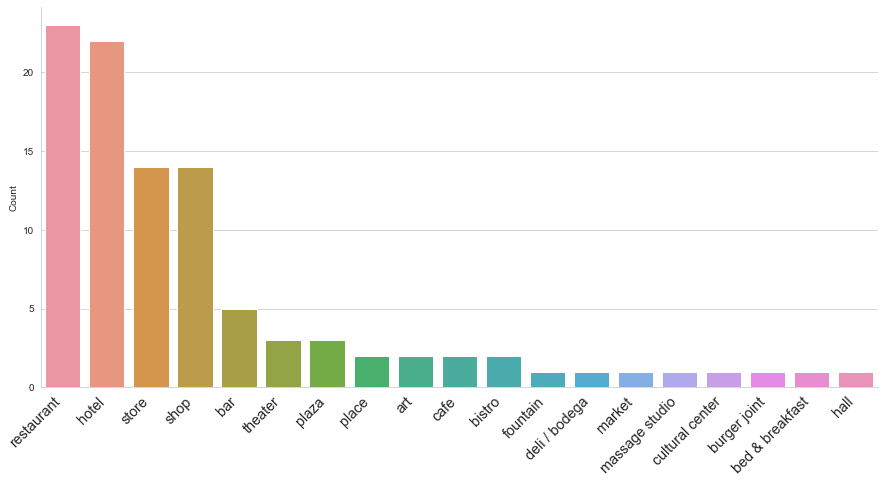

In [65]:
plt.figure(figsize=(15,7))
sns.barplot(x=barcelona.columns, y=barcelona.values[0])
sns.despine()
plt.ylabel('Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.show()

## EDA Tarragona

In [66]:
tarragona = cluster1.loc[['Tarragona']]

In [67]:
tarragona = convert(tarragona)
#tarragona

In [68]:
tarragona = tarragona.sort_values(by=tarragona.index[0], axis=1, ascending=False)
tarragona

,shop,market,place,hotel,art,bakery,plaza,store,bar,breakfast spot,burger joint,event space,restaurant
City,,,,,,,,,,,,,
Tarragona,5,4,4,3,2,2,2,2,1,1,1,1,1


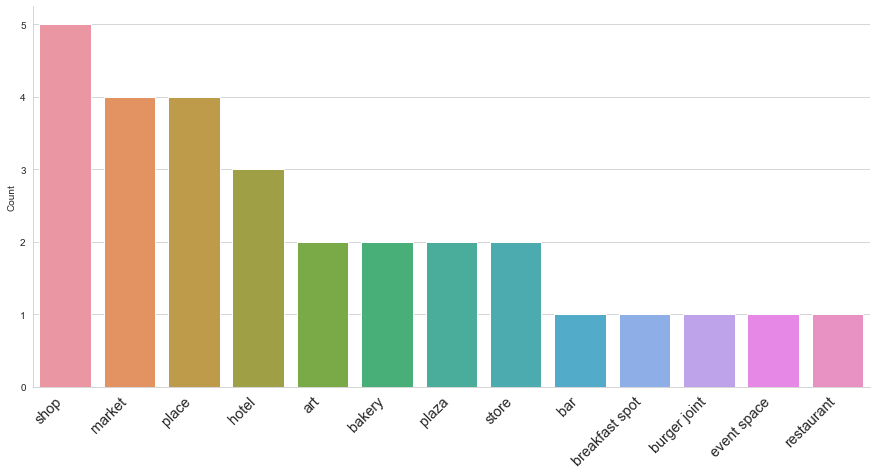

In [69]:
plt.figure(figsize=(15,7))
sns.barplot(x=tarragona.columns, y=tarragona.values[0])
sns.despine()
plt.ylabel('Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.show()

## EDA Ceuta

In [70]:
ceuta = cluster1.loc[['Ceuta']]

In [71]:
ceuta = convert(ceuta)
#ceuta

In [72]:
ceuta = ceuta.sort_values(by=ceuta.index[0], axis=1, ascending=False)
ceuta

,cafe,hotel,beach,plaza,restaurant,shop,store
City,,,,,,,
Ceuta,2,2,1,1,1,1,1


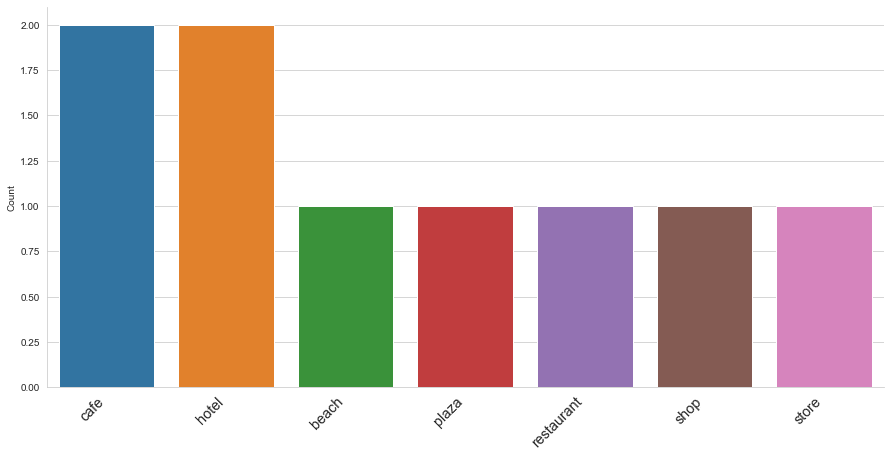

In [73]:
plt.figure(figsize=(15,7))
sns.barplot(x=ceuta.columns, y=ceuta.values[0])
sns.despine()
plt.ylabel('Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.show()